In [2]:
##  Linear Regression Model that predicts the Price of Car based on its relevant features.
##  car_price.csv is the dataset used.
##  Insignificant features filtered from the dataset are :engine_size, width, drive_wheels columns.

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
cp = pd.read_csv(r"C:\Users\Saraswathy\Downloads\car_price.csv", na_values="?")

In [246]:
cp.shape

(205, 26)

In [247]:
cp.head(5)

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [205]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [248]:
cp.corr()

,symboling,normalized_losses,drive_wheels,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized_losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
drive_wheels,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb_weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine_size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


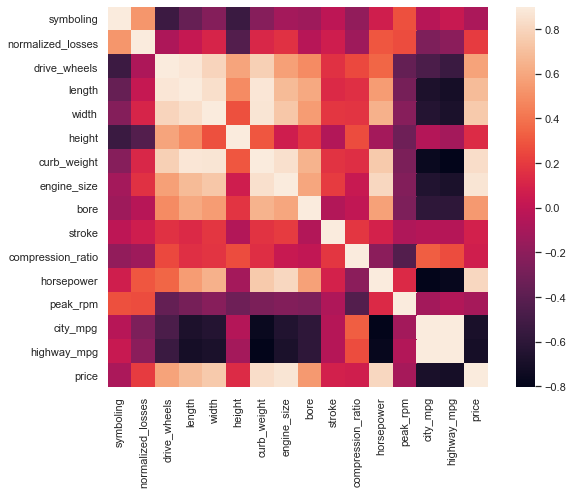

In [207]:
# Plot the Correlation map to see how features are correlated with target: Price
corr_matrix = cp.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

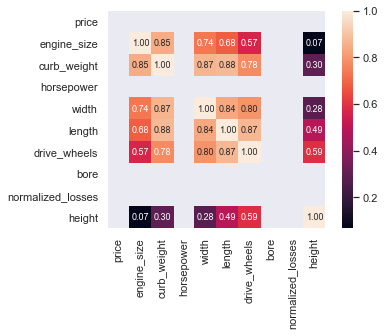

In [208]:
# Car price correlation matrix
import numpy as np

corr_matrix=cp.corr()


k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'price')['price'].index
cm = np.corrcoef(cp[cols].values.T)
sns.set(font_scale=1.00)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

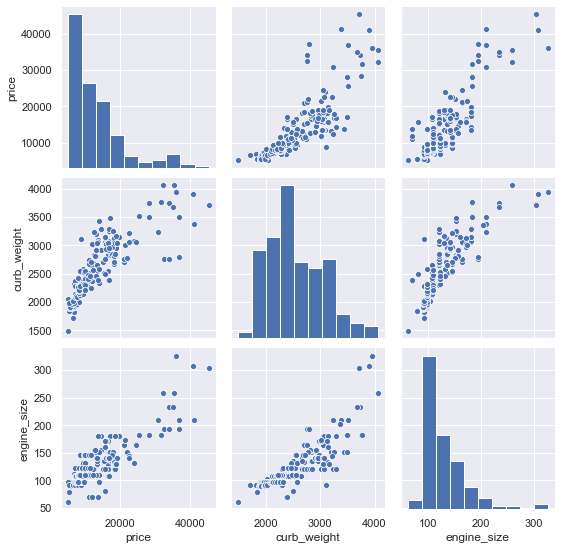

In [209]:
#scatterplot for selected columns (defined in cols)
sns.set()
  # cols = ['price' , 'engine_location' , 'bore']
cols = ['price' , 'curb_weight', 'engine_size']
  #cols = ['price', 'length', 'width']
 #cols= ['price', 'highway_mpg', 'city_mpg']
 #cols = ['price', 'length', 'drive_wheels', 'width']
 #cols = ['price', 'length', 'drive_wheels', 'width', 'curb_weight', 'engine_size']
sns.pairplot(cp[cols], height = 2.5)
plt.show();

In [210]:
cp.isnull().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [23]:
#cp.isnull().sum() / 205 *100

In [249]:
#fill all nulls in Numeric columns with their respective Median values

cp.fillna(cp.median(), inplace=True)

In [250]:
cp.num_of_doors.fillna( "four", inplace=True)

In [251]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cp[cp.select_dtypes(include=['object']).columns]  = cp[cp.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [252]:
cp.head(3)

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,1,0,1,0,2,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,1,0,1,0,2,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,1,0,1,2,2,0,94.5,0,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [253]:
# Finding Variance Inflation Factor (VIF)

from   statsmodels.stats.outliers_influence    import     variance_inflation_factor

In [254]:
ca_x = cp.drop(["price"], axis=1)
ca_y = cp.iloc[: , -1]

In [255]:
vif = pd.DataFrame()
vif["vif_values"] = [ variance_inflation_factor(ca_x.values, i) for i in range(ca_x.shape[1])]
vif["Variables"]  = ca_x.columns
vif

,vif_values,Variables
0,4.645043,symboling
1,27.119922,normalized_losses
2,851.520772,Fuel_type
3,3.459879,make
4,4.995808,num_of_doors
5,29.663339,aspiration
6,18.217974,wheel_base
7,1.778809,engine_location
8,2935.847903,drive_wheels
9,7.223572,body_style


In [256]:
# Sampling
feature_drop=["engine_size", "width" , "drive_wheels","price"]
cp_x = cp.drop( feature_drop, axis = 1)
cp_y = cp.iloc[:,-1]
#cp_x

In [257]:
cp_x.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,body_style,length,height,curb_weight,engine_type,num_of_cylinders,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,115.0,1,0,1,0,2,0,0,168.8,48.8,2548,0,2,5,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,115.0,1,0,1,0,2,0,0,168.8,48.8,2548,0,2,5,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,115.0,1,0,1,2,2,0,0,171.2,52.4,2823,5,3,5,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,1,0,0,3,1,0,1,176.6,54.3,2337,3,2,5,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,1,0,0,3,0,0,1,176.6,54.3,2824,3,1,5,3.19,3.40,8.0,115.0,5500.0,18,22


In [258]:
from sklearn.model_selection import train_test_split

cp_x_train , cp_x_test , cp_y_train , cp_y_test = train_test_split(cp_x , cp_y , test_size = .2 , random_state =111 )

In [259]:
print(cp_x_train.shape)
print(cp_y_train.shape)
print("-----------")
print(cp_x_test.shape)
print(cp_y_test.shape)

(164, 22)
(164,)
-----------
(41, 22)
(41,)


In [260]:
from sklearn import preprocessing

cp_x_train_scaled = preprocessing.normalize(cp_x_train)
cp_x_test_scaled = preprocessing.normalize(cp_x_test)

In [261]:
from sklearn import linear_model

reg_cp = linear_model.LinearRegression(fit_intercept=True,normalize=True,copy_X=True)

In [262]:
reg_cp.fit(cp_x_train_scaled, cp_y_train)

LinearRegression(normalize=True)

In [263]:
reg_cp.coef_

array([ 8.56185995e+05, -1.21928843e+05, -8.40187480e+07, -1.29879114e+07,
       -2.45589132e+06, -5.91651562e+06,  5.57506908e+06,  8.80355389e+07,
       -1.07392858e+06,  1.00460764e+06, -4.24223033e+05, -5.98157857e+04,
        4.53116124e+06,  4.80687039e+05,  9.39140765e+05, -1.89700493e+07,
       -1.77329078e+07, -5.94787838e+06,  2.89785197e+05, -1.90248889e+05,
        3.56965349e+05, -1.54655012e+04])

In [264]:
reg_cp.intercept_

224167.25456027346

In [265]:
coef_names  = pd.DataFrame({"Feature_name" : cp_x_train.columns ,    "Coef_Values" :reg_cp.coef_ })

In [266]:
coef_names.sort_values("Coef_Values")

,Feature_name,Coef_Values
2,Fuel_type,-8.401875e+07
15,bore,-1.897005e+07
16,stroke,-1.773291e+07
3,make,-1.298791e+07
17,compression_ratio,-5.947878e+06
5,aspiration,-5.916516e+06
4,num_of_doors,-2.455891e+06
8,body_style,-1.073929e+06
10,height,-4.242230e+05
19,peak_rpm,-1.902489e+05


In [267]:
Rsquare =  reg_cp.score(cp_x_train_scaled , cp_y_train) 
N       =  164
K       =  22

print("Value of R square is  " , Rsquare)

Adj_R_Square =       1 -     (1 - Rsquare)*(N -1)   /     (N - K -1)

print("Value of Adjusted R square is      "  , Adj_R_Square)

Value of R square is   0.801447805164899
Value of Adjusted R square is       0.7704680300842449


In [268]:
# Checking Assumptions of LR
predn_train  = reg_cp.predict(cp_x_train_scaled)
error_train = cp_y_train - predn_train

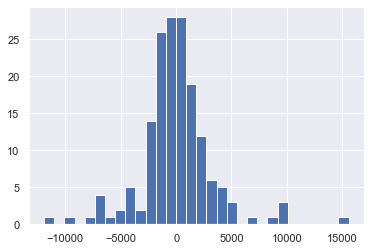

In [269]:
plt.hist(error_train, bins = 30);

In [270]:
import numpy as np
np.mean(error_train) ## Mean should be closer to 0.

3.6734712832584614e-11

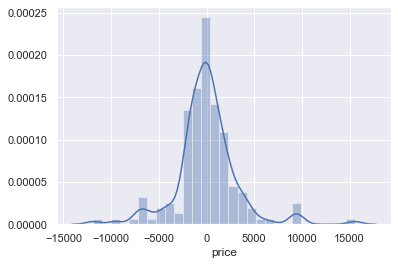

In [271]:
sns.distplot(error_train);

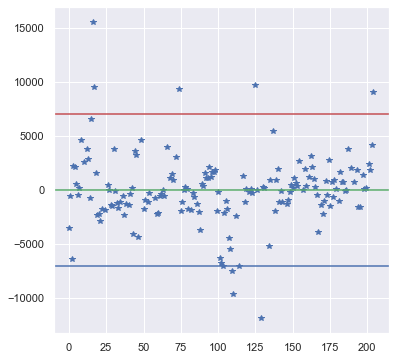

In [272]:
plt.figure(figsize=( 6,6))
plt.plot(error_train, "*")
plt.axhline(y = 7000 , color = "r")
plt.axhline(y = -7000 , color = "b")
plt.axhline(y = np.mean(error_train) , color = "g")

In [273]:
predn_test =  reg_cp.predict(cp_x_test_scaled)
error_test =  cp_y_test - predn_test

In [274]:
#Comparing Actual & Predicted values

actual_pred = pd.DataFrame({"Predicted" : predn_test, "Actual" : cp_y_test})
actual_pred

,Predicted,Actual
67,25575.342724,25552.0
127,32528.000000,34028.0
39,11498.386060,8845.0
180,18143.093155,15690.0
168,12335.581490,9639.0
11,13965.699535,16925.0
111,19672.566408,15580.0
156,5944.131165,6938.0
56,14145.880666,11845.0
71,33292.426403,34184.0


In [275]:
# MAPE
MAPE           =   np.mean( np.abs(error_test /  cp_y_test))* 100
MAPE

17.71365817891117

In [276]:
# Accuracy
Acc=100-MAPE
Acc

82.28634182108883

In [277]:
# MSE
MSE = np.mean(np.square(error_test))
MSE

8479754.831497421

In [278]:
# RMSE
RMSE=np.sqrt(MSE)
RMSE

2912.0018598032216

In [279]:
# MAE
MAE =np.mean(np.abs(error_test))
MAE

2247.2855921491105